# Project: Collaboration between actors in the two datasets 

Module: COMP30850 Network Analysis 

Student Number: 17328666


## 1.	Network construction

The technique of examining social structures using networks and graph theory is known as social network analysis (SNA). The nodes (individual actors, people, or objects inside the network) and the ties, edges, or linkages (relationships or interactions) that connect them are used to describe networked architectures. 

Below I haved loaded both datasets that will be used for visulization and analysis work.

In [1]:
#Import Libraries
import pandas as pd
import json
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load dataset 1
with open('17328666-dataset1.json') as f1:  
    data1 = json.load(f1)
    df1=pd.DataFrame(data1)

#Load dataset 2
with open('17328666-dataset2.json') as f2:  
    data2 = json.load(f2)
    df2=pd.DataFrame(data2)

In [3]:
# Show Dataset 1 
df1.head()

,id,name,born,movies
0,0931329,Michelle Williams,1980-09-09,"[{'id': '14208870', 'title': 'The Fabelmans', ..."
1,0000182,Jennifer Lopez,1969-07-24,"[{'id': '9686790', 'title': 'Shotgun Wedding',..."
2,0000138,Leonardo DiCaprio,1974-11-11,"[{'id': '11286314', 'title': 'Don't Look Up', ..."
3,0000107,Kim Basinger,1953-12-08,"[{'id': '10002230', 'title': 'Back Home Again'..."
4,3485845,Adam Driver,1983-11-19,"[{'id': '6160448', 'title': 'White Noise', 'ye..."


In [4]:
# Show Dataset 2 
df2.head()

,id,name,born,movies
0,0824785,Paprika Steen,1964-11-03,"[{'id': '3282076', 'title': 'Domino', 'year': ..."
1,1631269,Chloë Grace Moretz,1997-02-10,"[{'id': '13029044', 'title': 'Mother/Android',..."
2,0206257,Rosario Dawson,1979-05-09,"[{'id': '15179396', 'title': 'Batman: The Audi..."
3,0000443,Goldie Hawn,1945-11-21,"[{'id': '11057644', 'title': 'The Christmas Ch..."
4,0565250,Melissa McCarthy,1970-08-26,"[{'id': '10648342', 'title': 'Thor: Love and T..."


In [5]:
print('Number of Actors in First Dataset:', len(df1))
print('Number of Actors in Second Dataset:', len(df2))

Number of Actors in First Dataset: 191
Number of Actors in Second Dataset: 212


As shown above there are 191 actors within the first dataset and 212 in the second dataset. 

In this section I explore headers (actor's details) and sub-headers (movies in which an actor appear) in the datasets, so that I can check the network structure and create networks accordingly.

In [6]:
print("What is known about each actor's movies:")
print(df2['movies'][0][0]) # the first actors movie was chosen as an example 

What is known about each actor's movies:
{'id': '3282076', 'title': 'Domino', 'year': 2019, 'kind': 'movie'}


Here you can see that the movies id, name, year and kind are all availble within both datasets. 

I will now remove isolated nodes from the dataset. 

In [7]:
def network_extraction(dataset: list) -> nx.Graph:

    # Movies that at least two actors were in
    
    def count_collab_movies(actor1: dict, actor2: dict) -> int:
        movies1 = set(m['id'] for m in actor1['movies'])
        movies2 = set(m['id'] for m in actor2['movies'])
        return len(movies1.intersection(movies2))

    g = nx.Graph()

    #  Check every pair of actors and add edges if an actor has collobrated with at least 1 other actor, if not don't add.
    for actor1, actor2 in combinations(dataset, r=2):
        collab_movies = count_collab_movies(actor1, actor2)

        if collab_movies != 0:
            g.add_edge(actor1['name'], actor2['name'], weight=collab_movies)
    return g

first_network = network_extraction(data1)
second_network = network_extraction(data2)

Each actor dataset generates an undirected, weighted network. The edges between nodes signify a co-starring arrangement between actors, and the nodes themselves stand in for the actors' names. The weight attribute on the borders indicates how many films any two actors have appeared in together. As two performers co-starring in a film implies a reciprocal relationship, the network is undirected. To prevent isolated nodes, actors are only included in the network if they share an edge with one other actor, at minimum. 

## 2. Network Characterisation

For many scientific domains that rely on network research, understanding the structure and behaviour of networks is crucial. Numerous elements offered by complex network theory aid in the assessment of network activity.I have characterised the structure of two networks, first_network and second_network, and applied different centrality measures such as degree centrality, closeness centrality, betweeness centrality, and eigenvector centrality to identify important nodes.

### 2.1 Network Size and Edge Weight Distribution

Counting the number of nodes and edges in the network is the simplest characterization to carry out:

In [8]:

#Simple stats for the first network
print('Some stats for the first network:')
print(nx.info(first_network))

#Simple Stats of Second Network
print('\nSome stats for the second network:')
print(nx.info(second_network))

Some stats for the first network:
Name: 
Type: Graph
Number of nodes: 169
Number of edges: 455
Average degree:   5.3846

Some stats for the second network:
Name: 
Type: Graph
Number of nodes: 176
Number of edges: 473
Average degree:   5.3750


According to the project requirements I must remove isolated nodes from the network. The above stats show that 169 out of 191 actors have been added in first network and 176 out of 212 actors have been added in second network. The remaining nodes were separated and not included in the network because they were isolated nodes. 

In social network analysis, a weighted network is a network in which edges between nodes have weights assigned to them. These weights represent the strength or magnitude of the relationship between nodes. The weights can be numerical values, binary values, or any other values that quantify the strength of the relationship between nodes. We may want to examine the distribution of the edge weights because the networks are weighted.

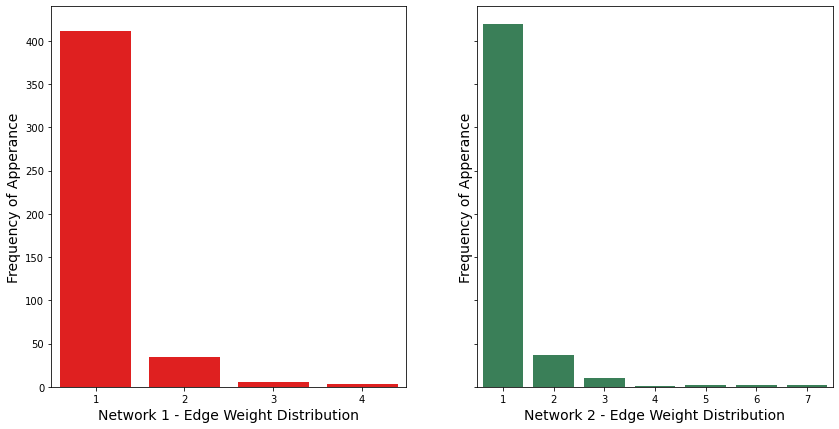

In [9]:
def get_edge_weights(net):
    # returns a list of integers representing edge weights
    return [e[2]['weight'] for e in net.edges(data=True)]

weights1 = get_edge_weights(first_network)
weights2 = get_edge_weights(second_network)

#Barchart used to represent data for both Network 1 and 2.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(14, 7), sharey=True)

sns.countplot(x=weights1, color='red', ax=ax1)
ax1.set_xlabel('Network 1 - Edge Weight Distribution', fontsize=14)
ax1.set_ylabel('Frequency of Apperance', fontsize=14)

sns.countplot(x=weights2, color='seagreen', ax=ax2)
ax2.set_xlabel('Network 2 - Edge Weight Distribution', fontsize=14)
ax2.set_ylabel('Frequency of Apperance', fontsize=14)
plt.show()

Since unique edge weights are very few, there is no need to use complex visual displays to analyze the weight distribution. I opted to use a bar plot to count the number of times a specific weight appears in the network.

### 2.2 Actors Co-Starring

Actors co-starring refers to the relationships between actors or actresses in a movie or a TV series. In this context, actors co-starring is represented as an edge between two actors or actresses, where the edge represents the fact that they have appeared together in the same movie or TV series. For each network, I can order edges by weight, thus showing the actors who have co-starred in the most number of movies. In social network analysis, co-starring relationships can be modeled as a weighted network, where the weight assigned to the edge represents the strength of the relationship between two actors. For example, the weight can reflect the number of times two actors have appeared together, the length of their appearance together, or their screen time together.

In [10]:
# Find and print the top 15 edges by weight
def print_collab_actors(net, ntop):
    sorted_by_weight = sorted(list(net.edges(data=True)), 
                              key=lambda x: x[2]['weight'], # use the weight as sorting key
                              reverse=True # sort descending 
                             )
    print('Top', ntop, 'collaborators:')
    for actor1, actor2, edge_attributes in sorted_by_weight[:ntop]:
        print(f"{actor1} and {actor2} collaborated {edge_attributes['weight']} times")

print_collab_actors(first_network, ntop=15)

Top 15 collaborators:
Timothée Chalamet and Saoirse Ronan collaborated 4 times
Mark Hamill and Carrie Fisher collaborated 4 times
Amy Adams and Jesse Eisenberg collaborated 4 times
Ron Perlman and Cate Blanchett collaborated 3 times
Chris Evans and Josh Brolin collaborated 3 times
Chris Evans and William Hurt collaborated 3 times
Adam Driver and John Boyega collaborated 3 times
Benicio Del Toro and Josh Brolin collaborated 3 times
Colin Firth and Julie Walters collaborated 3 times
Michelle Williams and Woody Harrelson collaborated 2 times
Julianne Moore and Amy Adams collaborated 2 times
Leonardo DiCaprio and Brad Pitt collaborated 2 times
Kim Basinger and Jamie Dornan collaborated 2 times
Jamie Dornan and Ben Mendelsohn collaborated 2 times
Adam Driver and Kelly Marie Tran collaborated 2 times


In [11]:
print_collab_actors(second_network, ntop=15)

Top 15 collaborators:
Devon Murray and Mark Williams collaborated 7 times
Oliver Phelps and James Phelps collaborated 7 times
Devon Murray and Chris Rankin collaborated 6 times
Mark Williams and Chris Rankin collaborated 6 times
Devon Murray and Oliver Phelps collaborated 5 times
Oliver Phelps and Mark Williams collaborated 5 times
Domhnall Gleeson and Daisy Ridley collaborated 4 times
Jennifer Lawrence and Philip Seymour Hoffman collaborated 3 times
Adam Sandler and Steve Buscemi collaborated 3 times
Matthew McConaughey and Scarlett Johansson collaborated 3 times
Matthew McConaughey and Reese Witherspoon collaborated 3 times
Kerry Condon and Gwyneth Paltrow collaborated 3 times
Scarlett Johansson and Mark Ruffalo collaborated 3 times
Scarlett Johansson and Reese Witherspoon collaborated 3 times
Devon Murray and James Phelps collaborated 3 times


The two pairs that co-starred with each other the most are Devon Murray & Mark Williams and Oliver Phelps & James Phelps. Both pairs are found in Network two and have worked with one another 7 times. In comparison the top co-starring pair in network 1 ,Timothee Chalamet and Saoirse Ronan, have only worked together four times. It is notable that actors who appear within the top 15 co-star pariings have frequent crossovers with one another. Devon Murray alone appears four times in the top 15 pairings for network 2. Chris Rankin, Scarlett Johansson, James Phelps, Mark Williams, Chris Evans, Amy Adams etc, all appear in multiple top 15 pairings in there respective networks. 

### 2.3 Network Density and Connectedness 

<ul>
    <li><b>Network density</b> is a measure of the level of connectedness in a network. It is defined as the ratio of the number of actual connections (edges) in a network to the maximum number of connections that could exist between the nodes in the network. Network density provides a general picture of the overall structure of the network and can help to assess the level of clustering, centralization, and decentralization in a network.</li>
<li><b>A connected network</b> is a type of network in which there exists a path between every pair of nodes. In other words, in a connected network, it is possible to reach any node from any other node by following a sequence of edges. This implies that all nodes are connected to each other directly or indirectly, and there are no isolated nodes or sub-networks in the network.</li>
</ul>

In [12]:
def compute_connectedness_stats(net):
    density = round(nx.density(first_network), 3)
    print('Density:', density)
    if nx.is_connected(net):
        print('The network is connected')
        # no need to compute connected components 
        # as for connected networks there is only 1 component
        print('Network diameter:', nx.diameter(net))
        print('Average shortest path length:', nx.average_shortest_path_length(net))
    else:
        print('The network is not connected')
        conn_comps = list(nx.connected_components(net))
        print('THe network has', len(conn_comps), 'connected components')

        print('Connected components sizes:', [len(c) for c in conn_comps])
        largest_cc = nx.subgraph(net, conn_comps[0])
        print('Network diameter (largest component):', nx.diameter(largest_cc))
        print('Average shortest path length (largest component):', nx.average_shortest_path_length(largest_cc))

In [13]:
print('First network connectednes stats:')
compute_connectedness_stats(first_network)
print('\nSecond network connectednes stats:')
compute_connectedness_stats(second_network)

First network connectednes stats:
Density: 0.032
The network is not connected
THe network has 6 connected components
Connected components sizes: [155, 4, 4, 2, 2, 2]
Network diameter (largest component): 9
Average shortest path length (largest component): 3.4572266443234185

Second network connectednes stats:
Density: 0.032
The network is not connected
THe network has 6 connected components
Connected components sizes: [157, 9, 3, 3, 2, 2]
Network diameter (largest component): 10
Average shortest path length (largest component): 3.441858566062388


The density of first network and second network is, approximately 0.03, this means that the network is sparse, and that there are relatively few connections between the nodes compared to the maximum number of connections that could exist. The exact interpretation of this value depends on the type of network and the number of nodes in the network. Network 1 is not connected, and has six separate components with 155, 4, 4, 2, 2 and 2 nodes respectively. Similarly, Network 2 is not connected, and has six separate components with 157, 9, 3, 3, 2 and 2 nodes respectively.

For an undirected network with n nodes, a density of approximately 0.03 indicates that there are about 0.03 * n * (n-1) / 2 actual connections in the network, and that there are many possible connections between the nodes that are not present. For a directed network with n nodes, a density of approximately 0.03 indicates that there are about 0.03 * n * (n-1) actual connections in the network.

A network with a low density is characterized by a low level of connectedness, which may imply that the network is either fragmented into isolated sub-networks or that there are many isolated nodes. A dense network, on the other hand, has many edges and is characterized by a high level of connectedness, which indicates that the network is well-integrated and that nodes are highly interdependent.

The diameter of a network is a measure of the maximum distance between any two nodes in the network. It is defined as the length of the longest shortest path between any two nodes in the network. In other words, the diameter is the maximum number of edges that must be traversed in order to travel from one node to another node in the network. The First Network is not connected and the diameter of the entire network is undefined, and I can only work with the (larger) component comprising 155 nodes. Similarly, the Second Network is not connected and the diameter of the entire network is undefined, and I can only work with the (larger) component comprising 157 nodes.

In this sense, the diameter can be thought of as a linear measurement of the network, as it provides a measure of the maximum separation between nodes along the network's edges. This is different from other measures of network size, such as the number of nodes or edges, which provide a more global measure of the network's size.

The average shortest path length between any two nodes in a network provides a measure of the overall connectedness of the network, and is used to quantify the degree of separation between nodes. It provides information on how quickly information, resources, or influence can spread through the network, and can be used to compare the connectedness of different networks.

Average shortest paths of length ~3 for both networks is significant. Which means that the average distance between any two nodes in the two networks is approximately 3. This is considered to be a relatively small distance, and suggests that the networks are well-connected and have a compact structure.

In this context, the term "significant" is used to indicate that the average shortest path length of 3 has some importance or relevance for the networks in question. This may be because it is significantly smaller than the average shortest path length in similar networks, or because it has some practical implications for the spread of information or resources through the network.

It is also possible that the average shortest path length of 3 is significant because it meets some pre-defined threshold or criterion, such as a minimum level of connectedness required for a network to function effectively.

It means that overall, for any four actors A, B, C, D, if A, B, and C have not co-starred in a movie, they have at least worked with the fourth actor D, who has worked with other actors A, B, and C.

Overall, the significance of the average shortest path length of 3 for the two networks will depend on the specific context and goals of the analysis, and the interpretation of this result should be informed by a deeper understanding of the networks and their properties. 

### 2.4 Clustering Coefficient

A node's clustering coefficient provides information about the degree of transitivity in the network, which is the extent to which nodes tend to form clusters or communities, where nodes within a cluster are highly connected to each other and less connected to nodes outside the cluster. High clustering coefficients indicate a high degree of transitivity and a strong local interconnectedness, while low clustering coefficients indicate a lower degree of transitivity and a more dispersed network structure.

The clustering coefficient of a node can be computed in several different ways, depending on the specific network analysis and the type of network being analyzed. Some common methods for computing the clustering coefficient include the average clustering coefficient, which is the average clustering coefficient of all nodes in the network, and the local clustering coefficient, which is the clustering coefficient of a single node.

Overall, the clustering coefficient of a node is a useful measure for understanding the local structure of a network, and can provide insights into the degree of community structure and the potential for information or resources to spread within the network.

Computing the scores for every node in a network, as well as the average scores for the full network, can provide valuable insights into the structure and properties of the network. This information can be used to identify key nodes, or to understand the overall network structure and patterns of connectivity.

For example, in the case of computing the clustering coefficient for every node in a network, this information can be used to identify nodes with high clustering coefficients, which may be hubs of activity or play important roles in information transfer or resource allocation. This information can also be used to identify clusters or communities within the network, and to understand the local structure of the network.

Similarly, if the scores are based on measures such as centrality, betweenness, or degree, this information can be used to identify nodes that play central or influential roles in the network, and to understand the distribution of connectivity and influence within the network.

By computing both the scores for individual nodes and the average scores for the full network, it is possible to gain a more complete understanding of the network structure and properties. This information can be used to make informed decisions about network design, resource allocation, or other network-related tasks.

Additionally, by displaying the top 15 scores, it is possible to focus on the most important or relevant nodes, rather than being overwhelmed by the complete network. This can be particularly useful in large or complex networks, where the full network information may be difficult to interpret or understand.

In [14]:
# top 15 nodes by clustering coefficient scores
def print_coefficient_clusters(net, ntop):
    clustering = nx.clustering(net)
    sorted_by_cluster = sorted(clustering.items(),
                              key= lambda actor_and_score: actor_and_score[1], # sort by score
                               reverse=True
                              )
    for actor, score in sorted_by_cluster[:ntop]:
        print(actor, '\t', round(score, 3))
                               

In [15]:
print_coefficient_clusters(first_network, ntop=15)

Billy Dee Williams 	 1.0
Carrie Fisher 	 1.0
Glenda Jackson 	 1.0
Jena Malone 	 1.0
Mélanie Laurent 	 1.0
William Holden 	 1.0
Rex Harrison 	 1.0
Mark Hamill 	 0.818
Adrien Brody 	 0.714
Laura Dern 	 0.709
Tom Wilkinson 	 0.7
Alan Rickman 	 0.667
Bonnie Wright 	 0.667
Kelly Marie Tran 	 0.615
Michael McElhatton 	 0.607


In [16]:
print_coefficient_clusters(first_network, ntop=15)

Billy Dee Williams 	 1.0
Carrie Fisher 	 1.0
Glenda Jackson 	 1.0
Jena Malone 	 1.0
Mélanie Laurent 	 1.0
William Holden 	 1.0
Rex Harrison 	 1.0
Mark Hamill 	 0.818
Adrien Brody 	 0.714
Laura Dern 	 0.709
Tom Wilkinson 	 0.7
Alan Rickman 	 0.667
Bonnie Wright 	 0.667
Kelly Marie Tran 	 0.615
Michael McElhatton 	 0.607


The globally averaged clustering coefficient is a measure of the overall interconnectedness of a network. It reflects the average probability that two randomly chosen neighbors of a node are themselves neighbors. The globally averaged clustering coefficient provides information about the degree of transitivity in the network as a whole, which is the extent to which nodes tend to form clusters or communities, where nodes within a cluster are highly connected to each other and less connected to nodes outside the cluster.

The globally averaged clustering coefficient is computed as the average of the clustering coefficients of all nodes in the network. It provides a single value that summarizes the overall level of clustering in the network, and can be used to compare the degree of transitivity between different networks.

In [17]:
print('First Network average clustering coefficient: ' + 
      f'{round(nx.average_clustering(first_network), 3)}')
print('Second Network average clustering coefficient: ' + 
      f'{round(nx.average_clustering(second_network), 3)}')

First Network average clustering coefficient: 0.216
Second Network average clustering coefficient: 0.265


Overall, both networks have comparable average clustering coefficient scores ~0.2 which means that the two networks being compared have similar levels of interconnectedness, as measured by the globally averaged clustering coefficient. A score of ~0.2 for the globally averaged clustering coefficient indicates that on average, two randomly chosen neighbors of a node are likely to be connected to each other with a probability of about 0.2.

This suggests that the two networks have similar levels of transitivity, where nodes tend to form clusters or communities, where nodes within a cluster are highly connected to each other and less connected to nodes outside the cluster. This can provide insights into the overall network structure, and helps to identify potential clusters or communities within the network.

It is important to note that a globally averaged clustering coefficient of ~0.2 is relatively low, which indicates that the two networks have a dispersed structure, rather than a highly interconnected structure. However, the fact that the two networks have comparable scores suggests that their overall network structures are similar, even if the level of interconnectedness is not particularly high.

After examining the two networks' structures, we I now implement various centrality tests. Rankings created by centrality indices aim to pinpoint the most crucial nodes in a network model. Different centrality indexes represent the word "importance" in various contexts.

### 2.5 Degree Distribution

Degree distribution is a term used in graph theory to describe the distribution of the number of edges connected to each vertex in a graph. It is a statistical measure that gives us information about how many vertices in a graph have a certain number of edges. For example, if a graph has a high degree of symmetry, then the degree distribution is expected to be more uniform, with most vertices having a similar number of edges. On the other hand, if a graph has a more complex structure, the degree distribution may be more skewed, with some vertices having many more edges than others. The degree distribution can provide important insights into the structure and behavior of complex networks and is used in many areas of study, including social networks, the Internet, and biology.

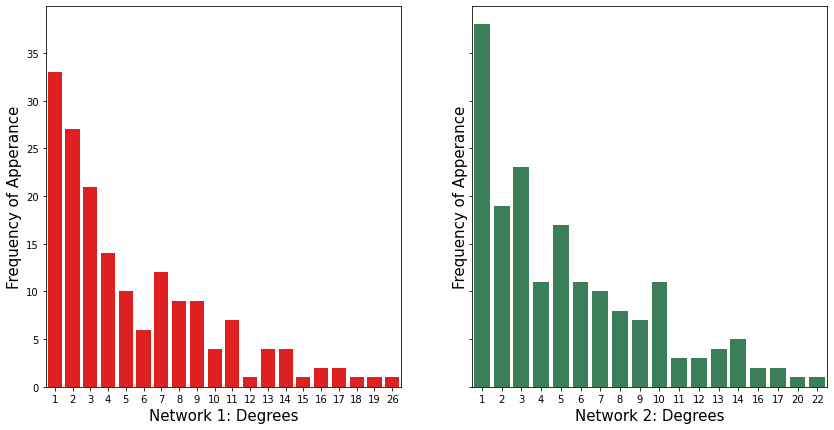

In [18]:
# Caclulate the node distribution and use that to plot barcharts for each network

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(14, 7),
                               sharey=True)

degrees1 = list(dict(nx.degree(first_network)).values())
degrees2 = list(dict(nx.degree(second_network)).values())
sns.countplot(x=degrees1, color='red', ax=ax1)
ax1.set_xlabel('Network 1: Degrees', fontsize=15)
ax1.set_ylabel('Frequency of Apperance', fontsize=15)

sns.countplot(x=degrees2, color='seagreen', ax=ax2)
ax2.set_xlabel('Network 2: Degrees', fontsize=15)
ax2.set_ylabel('Frequency of Apperance', fontsize=15)
plt.show()

In [19]:
def print_network_info(net):
    deg = pd.Series(dict(nx.degree(net)))
    print(f'Range of degree: [{deg.min()}, {deg.max()}]')
    print(f'Mean of degree: {round(deg.mean(), 2)}')
    print(f'Median of degree: {deg.median()}')
    
print('First Network Degree Information:')
print_network_info(first_network)
print('\nSecond Network Degree Information:')
print_network_info(second_network)


First Network Degree Information:
Range of degree: [1, 26]
Mean of degree: 5.38
Median of degree: 4.0

Second Network Degree Information:
Range of degree: [1, 22]
Mean of degree: 5.38
Median of degree: 4.0


The mean (average) degree of a network is calculated by adding up the number of edges connected to each vertex in the network, and then dividing by the total number of vertices. The median degree is the degree of the vertex that separates the lower and upper halves of the degree distribution.

When the mean or median node degree for second Network is only slightly higher than that of first Network, it suggests that the overall structure of the two networks is similar in terms of the number of edges connected to each vertex. The fact that the distributions are gradually tapered means that the number of vertices with a given number of edges decreases as the number of edges increases. This implies that there is a limited number of vertices with a high degree, and most vertices have a moderate number of edges.

### 2.6 Degree Centrality

Degree centrality is a measure of the importance of a vertex in a graph, based on its degree (the number of edges connected to it). The idea behind degree centrality is that the more edges a vertex has, the more important it is in the network, as it has more connections to other vertices.

Degree centrality is a simple and widely used measure of centrality in network analysis. It is often used as a basic starting point for exploring the structure of a network, and can provide important information about which vertices play a central role in the network. For example, vertices with a high degree centrality may be more likely to act as hubs or intermediaries in a network, connecting many other vertices to each other.

However, it is important to note that degree centrality has limitations, as it only takes into account the number of edges a vertex has, and not their weight or direction. Other measures of centrality, such as betweenness centrality or eigenvector centrality, can provide a more nuanced understanding of the centrality of a vertex in a network.

In [20]:
def print_top_centrality(measure, ntop):
    """
    Returns top n node measure scores
    """
    print('Top', ntop, 'actors for this centrality score:')
    ranks = sorted(measure.items(),
                              key= lambda actor_and_score: actor_and_score[1], # sort by score
                               reverse=True
                              )
    for node, value in ranks[:ntop]:
        print(f"{node} with a value of: {round(value, 3)}")

In [21]:
# calculate degree centrality for all nodes 
degcent1 = dict(nx.degree(first_network))
degcent2 = dict(nx.degree(second_network))
print('First network:')
print_top_centrality(degcent1, ntop=15)
print('\nSecond network:')
print_top_centrality(degcent2, ntop=15)


First network:
Top 15 actors for this centrality score:
Benicio Del Toro with a value of: 26
Willem Dafoe with a value of: 19
Timothée Chalamet with a value of: 18
Adam Driver with a value of: 17
John Boyega with a value of: 17
Chris Evans with a value of: 16
Amy Adams with a value of: 16
Lupita Nyong'o with a value of: 15
Oscar Isaac with a value of: 14
Josh Brolin with a value of: 14
Daniel Kaluuya with a value of: 14
Emily Blunt with a value of: 14
Kelly Marie Tran with a value of: 13
Justin Theroux with a value of: 13
Taron Egerton with a value of: 13

Second network:
Top 15 actors for this centrality score:
Scarlett Johansson with a value of: 22
Andy Serkis with a value of: 20
Paul Rudd with a value of: 17
Bill Murray with a value of: 17
Samuel L. Jackson with a value of: 16
Bryan Cranston with a value of: 16
Charlize Theron with a value of: 14
Matt Damon with a value of: 14
Michelle Pfeiffer with a value of: 14
Sam Rockwell with a value of: 14
Kerry Condon with a value of: 14
Hug

This means that, in First Network, the actor with the highest degree centrality score is Benicio Del Toro, with a score of 26. This indicates that he has worked with the largest number of other actors in the network, as measured by the number of edges connecting him to other vertices. Similarly, in second Network, the actor with the highest degree centrality score is Scarlett Johansson, with a score of 22, indicating that she has also worked with the largest number of other actors in her network.

In other words, these high degree centrality scores indicate that Benicio Del Toro and Scarlett Johansson have played key roles in their respective networks, as they have had the most connections to other actors in their networks. This demonstrates that they have either been involved in many films or worked on projects with a large number of other actors. They are the two central figures in this actors network.

### 2.7 Closeness Centrality

Closeness centrality is a measure of the centrality of a node in a network based on its average distance to all other nodes. The closer a node is to all other nodes in the network, the higher its closeness centrality score.

In other words, closeness centrality measures the average number of steps it takes to reach all other nodes from a given node. Nodes with high closeness centrality are able to access information or resources from other parts of the network quickly and efficiently, which makes them important for the flow of information and resources in the network.

Closeness centrality can be calculated for both directed and undirected networks and can provide valuable insights into the structure and function of the network. It is commonly used in fields such as sociology, computer science, and biology to analyze and understand complex networks.

Note that closeness centrality scores are often normalized by dividing the sum of distances by the number of nodes in the network, so that the scores can be compared across different-sized networks.

In [22]:
# calculate the closeness centrality for all nodes

clos1 = dict(nx.closeness_centrality(first_network))
clos2 = dict(nx.closeness_centrality(second_network))
print('First network:')
print_top_centrality(clos1, ntop=15)
print('\nSecond network:')
print_top_centrality(clos2, ntop=15)

First network:
Top 15 actors for this centrality score:
Benicio Del Toro with a value of: 0.389
Emily Blunt with a value of: 0.367
Willem Dafoe with a value of: 0.36
Josh Brolin with a value of: 0.359
Timothée Chalamet with a value of: 0.358
Daniel Kaluuya with a value of: 0.35
Oscar Isaac with a value of: 0.342
Amy Adams with a value of: 0.34
Chris Evans with a value of: 0.336
John Boyega with a value of: 0.335
Saoirse Ronan with a value of: 0.335
Ciarán Hinds with a value of: 0.335
Owen Wilson with a value of: 0.331
Adam Driver with a value of: 0.331
Jeremy Irons with a value of: 0.331

Second network:
Top 15 actors for this centrality score:
Scarlett Johansson with a value of: 0.363
Andy Serkis with a value of: 0.352
Paul Rudd with a value of: 0.349
Bryan Cranston with a value of: 0.349
Bill Murray with a value of: 0.335
Anthony Mackie with a value of: 0.334
Hugh Jackman with a value of: 0.33
Sam Rockwell with a value of: 0.33
Samuel L. Jackson with a value of: 0.33
Domhnall Gleeson

A closeness centrality score of 0.389 for Benicio Del Toro in first network indicates that on average, he is 0.389 steps away from all other nodes in the network. This means that he is relatively "close" to all other nodes in the network and has quick and efficient access to information or resources from other parts of the network.

Similarly, a closeness centrality score of 0.363 for Scarlett Johansson in second network indicates that on average, she is 0.363 steps away from all other nodes in the network. This means that she is relatively "close" to all other nodes in the network and has quick and efficient access to information or resources from other parts of the network.

Higher closeness centrality scores indicate that a node is closer to all other nodes in the network and is therefore more central. In both networks, Benicio Del Toro and Scarlett Johansson have relatively high closeness centrality scores, indicating that they are central and important nodes in their respective networks.

### 2.8 Betweenness & Weighted Betweenness Centrality

Betweenness centrality is a measure of the importance of a node (or vertex) in a network based on the number of shortest paths that pass through it. It is defined as the fraction of all shortest paths in the network that pass through a given node.
In other words, betweenness centrality measures the extent to which a node lies on the paths connecting other nodes in the network. Nodes with high betweenness centrality act as intermediaries or bridges between other nodes, and therefore have a significant impact on the flow of information or resources in the network.

Betweenness centrality can be calculated for both directed and undirected networks and can provide insights into the structure and function of the network. It is commonly used in fields such as sociology, computer science, and biology to analyze and understand complex networks.

Degree centrality fails to adequately express the concept of brokerage. The amount of traffic passing through a node to reach other nodes in the network is measured using betweenness centrality to estimate the relative importance of a node. This is accomplished by counting the proportion of pathways that contain the node of interest and connect all the node pairs. A network's strategic linkages or "bridging nodes" are then discovered. This approach allows for greater control over a networks transmission of information. 

In [23]:
# compute betweenness centrality for every node 
betw1 = dict(nx.betweenness_centrality(first_network))
betw2 = dict(nx.betweenness_centrality(second_network))
print('First network:')
print_top_centrality(betw1, ntop=15)
print('\nSecond network:')
print_top_centrality(betw2, ntop=15)

First network:
Top 15 actors for this centrality score:
Benicio Del Toro with a value of: 0.099
Emily Blunt with a value of: 0.09
Amy Adams with a value of: 0.087
Colin Firth with a value of: 0.055
Ciarán Hinds with a value of: 0.052
Willem Dafoe with a value of: 0.05
Julianne Moore with a value of: 0.047
Oscar Isaac with a value of: 0.045
Maggie Smith with a value of: 0.044
Timothée Chalamet with a value of: 0.042
Josh Brolin with a value of: 0.042
Kenneth Branagh with a value of: 0.041
Daniel Kaluuya with a value of: 0.04
Chris Evans with a value of: 0.039
Saoirse Ronan with a value of: 0.038

Second network:
Top 15 actors for this centrality score:
Scarlett Johansson with a value of: 0.102
Andy Serkis with a value of: 0.067
Bill Murray with a value of: 0.063
Matt Damon with a value of: 0.057
Paul Rudd with a value of: 0.048
Jon Bernthal with a value of: 0.045
Samuel L. Jackson with a value of: 0.045
Halle Berry with a value of: 0.044
Jonah Hill with a value of: 0.044
Liam Neeson wit

In [24]:
# Weighted betweenness centrality

weighted_betw1 = dict(nx.betweenness_centrality(first_network, weight='weight'))
weighted_betw2 = dict(nx.betweenness_centrality(second_network, weight='weight'))
print('First network:')
print_top_centrality(weighted_betw1, ntop=15)
print('\nSecond network:')
print_top_centrality(weighted_betw2, ntop=15)


First network:
Top 15 actors for this centrality score:
Benicio Del Toro with a value of: 0.113
Emily Blunt with a value of: 0.09
Amy Adams with a value of: 0.073
Willem Dafoe with a value of: 0.061
Ciarán Hinds with a value of: 0.057
Colin Firth with a value of: 0.054
Oscar Isaac with a value of: 0.048
Kenneth Branagh with a value of: 0.046
Julianne Moore with a value of: 0.046
Timothée Chalamet with a value of: 0.045
Daniel Kaluuya with a value of: 0.045
Maggie Smith with a value of: 0.043
Taron Egerton with a value of: 0.042
Jim Broadbent with a value of: 0.04
Chris Evans with a value of: 0.037

Second network:
Top 15 actors for this centrality score:
Scarlett Johansson with a value of: 0.081
Andy Serkis with a value of: 0.075
Bill Murray with a value of: 0.066
Matt Damon with a value of: 0.062
Samuel L. Jackson with a value of: 0.054
Jonah Hill with a value of: 0.05
Paul Rudd with a value of: 0.048
Jon Bernthal with a value of: 0.047
Harrison Ford with a value of: 0.046
Halle Berry

The first value, 0.099 for Benicio Del Toro (unweighted) and 0.113 (weighted), represents the fraction of all shortest paths in the first network that pass through him. In this network, he is the most important node, or "bridging node," as you mentioned, because he lies on the largest number of shortest paths between other nodes.

Similarly, the second value, 0.102 for Scarlett Johansson (unweighted) and 0.081 (weighted), represents the fraction of all shortest paths in the second network that pass through her. In this network, she is the most important node, because she lies on the largest number of shortest paths between other nodes.

It's worth noting that the unweighted and weighted values refer to the fact that the network can be either unweighted (edges have no weight) or weighted (edges have a weight, such as distance or cost). The betweenness centrality scores for a weighted network take into account the weights of the edges, while the scores for an unweighted network do not.

### 2.9 Eigenvector Centrality and Network Correlation

Eigenvector centrality is a measure of the importance of a node in a network based on the principle that a node is important if it is connected to other important nodes. It is a form of eigenvalue centrality, where the importance of a node is defined as the sum of the importance scores of its neighbors, where the importance of each neighbor is defined as the sum of the importance scores of its neighbors, and so on.

In other words, eigenvector centrality measures the influence of a node in a network by considering the influence of its neighbors. Nodes with high eigenvector centrality are important not just because they have many connections, but because they are connected to other important nodes in the network.

Eigenvector centrality can be calculated for both directed and undirected networks and can provide valuable insights into the structure and function of the network. It is commonly used in fields such as sociology, computer science, and biology to analyze and understand complex networks.

In [25]:
# compute eigenvector centrality for every node 
eigen1 = dict(nx.eigenvector_centrality(first_network))
eigen2 = dict(nx.eigenvector_centrality(second_network))
print('First network:')
print_top_centrality(eigen1, ntop=15)
print('\nSecond network:')
print_top_centrality(eigen2, ntop=15)

First network:
Top 15 actors for this centrality score:
Benicio Del Toro with a value of: 0.344
Adam Driver with a value of: 0.26
John Boyega with a value of: 0.253
Lupita Nyong'o with a value of: 0.25
Kelly Marie Tran with a value of: 0.23
Laura Dern with a value of: 0.223
Mark Hamill with a value of: 0.22
Gwendoline Christie with a value of: 0.215
Justin Theroux with a value of: 0.209
Timothée Chalamet with a value of: 0.202
Carrie Fisher with a value of: 0.195
Willem Dafoe with a value of: 0.183
Oscar Isaac with a value of: 0.179
Daniel Kaluuya with a value of: 0.157
Tilda Swinton with a value of: 0.157

Second network:
Top 15 actors for this centrality score:
Andy Serkis with a value of: 0.302
Bryan Cranston with a value of: 0.28
Paul Rudd with a value of: 0.276
Sam Rockwell with a value of: 0.244
Charlize Theron with a value of: 0.236
Hugh Jackman with a value of: 0.235
Jennifer Garner with a value of: 0.23
Adam Sandler with a value of: 0.229
Jason Segel with a value of: 0.219
Jac

A high eigenvector centrality score of 0.344 for Benicio Del Toro in the first network indicates that he is connected to many other important nodes in the network, and therefore has a large influence on the network as a whole. This means that changes in his connections or attributes could have a significant impact on the network.

Similarly, a high eigenvector centrality score of 0.302 for Andy Serkis in the second network indicates that he is connected to many other important nodes in the network and has a large influence on the network as a whole.

In both networks, the actors with the highest eigenvector centrality scores (Benicio Del Toro and Andy Serkis) are considered to be the most important actors, based on the idea that a node's importance is proportional to the importance of its neighbors. These actors play a key role in shaping the structure and dynamics of their respective networks.

Next I will examine the correlation of both networks.

In [26]:
nx.set_node_attributes(first_network, degcent1, 'degree')
nx.set_node_attributes(first_network, betw1, 'between_ctrlty')
nx.set_node_attributes(first_network, weighted_betw1, 'weighted_betw_ctrlty')
nx.set_node_attributes(first_network, clos1, 'closeness_ctrlty')
nx.set_node_attributes(first_network, eigen1, 'eigen_ctrlty')

first_network_cents = pd.DataFrame(dict(first_network.nodes())).transpose()
first_network_cents.head()

,degree,between_ctrlty,weighted_betw_ctrlty,closeness_ctrlty,eigen_ctrlty
Michelle Williams,3.0,0.022494,0.021742,0.248971,0.004977
Seth Rogen,2.0,0.010907,0.010907,0.196611,0.000444
Julianne Moore,8.0,0.046967,0.045963,0.323036,0.039588
Woody Harrelson,5.0,0.016334,0.010697,0.271474,0.016218
Jennifer Lopez,2.0,0.004750,0.005107,0.247661,0.009686


In [27]:
nx.set_node_attributes(second_network, degcent2, 'degree')
nx.set_node_attributes(second_network, betw2, 'between_ctrlty')
nx.set_node_attributes(second_network, weighted_betw2, 'weighted_betw_ctrlty')
nx.set_node_attributes(second_network, clos2, 'closeness_ctrlty')
nx.set_node_attributes(second_network, eigen2, 'eigen_ctrlty')
second_network_cents = pd.DataFrame(dict(second_network.nodes())).transpose()
second_network_cents.head()

,degree,between_ctrlty,weighted_betw_ctrlty,closeness_ctrlty,eigen_ctrlty
Paprika Steen,1.0,0.000000,0.000000,0.143216,0.000012
Nikolaj Coster-Waldau,2.0,0.010181,0.010181,0.170420,0.000121
Chloë Grace Moretz,1.0,0.000000,0.000000,0.235301,0.022509
Charlize Theron,14.0,0.023733,0.018947,0.318952,0.236418
Rosario Dawson,1.0,0.000000,0.000000,0.224657,0.006116


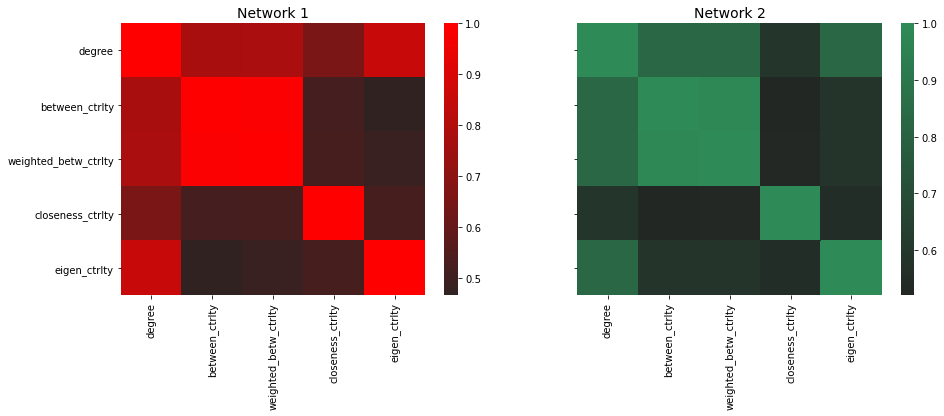

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(15, 5), sharex=True, sharey=True)
sns.heatmap(data=first_network_cents.corr(), cmap=sns.dark_palette(
    'red', as_cmap=True), ax=ax1)
ax1.set_title('Network 1', fontsize=14)

sns.heatmap(data=second_network_cents.corr(), cmap=sns.dark_palette(
    'seagreen', as_cmap=True), ax=ax2)
ax2.set_title('Network 2', fontsize=14)
plt.show()

A heatmap has been used to demonstrate the correlation of different network aspects above. It is interesting to note that for both networks, all centrality measures are highly correlated with one another. Even the least correlated pairs (betweenness and closeness) have a moderate positive correlation score of almost 0.5.

## 3. Unweighted Network through thresholding

Network thresholding is a technique used to simplify complex networks by removing edges or nodes based on certain criteria. The idea behind network thresholding is to reduce the number of connections in the network in order to better understand its structure and function. This can be useful in cases where the network is very large or complex, and a more simplified representation would be easier to analyze and interpret.

There are various thresholding methods that can be applied to networks, including:

Edge thresholding: This involves removing edges based on their weight, length, or some other attribute. Edges with low values are removed, and only the edges with high values are kept in the network.

Node thresholding: This involves removing nodes based on their degree, centrality, or some other attribute. Nodes with low values are removed, and only the nodes with high values are kept in the network.

Combined thresholding: This involves removing both edges and nodes based on certain criteria, creating a simplified network that retains the most important connections and nodes.

The choice of thresholding method depends on the specific goals of the analysis and the type of network being studied. Network thresholding can help to highlight the most important connections and nodes in the network, and can provide valuable insights into the network's structure and function.

Overall, network thresholding is a powerful tool for simplifying complex networks and for gaining a better understanding of their structure and function.

Applying different threshold levels to a network can have significant effects on the structure and properties of the network. Thresholding can convert a weighted network, where edges have different weights or strengths, into a new unweighted network, where all edges are treated as having the same strength.

When thresholding is applied to a weighted network, some edges may be removed based on their weight, length, or some other attribute. The choice of threshold level will determine which edges are removed and which are kept in the new unweighted network. If a high threshold level is used, then only the strongest edges will be kept in the network, while weaker edges will be removed. Conversely, if a low threshold level is used, then weaker edges will be kept in the network, while stronger edges will be removed.

The effects of applying different threshold levels to a network can be seen in several aspects of the network, including:

Network density: The density of the network is the proportion of actual edges in the network to the maximum number of possible edges. As the threshold level is increased, the network density will generally decrease, as more edges are removed from the network.

Network connectivity: The connectivity of the network refers to the number of connections between nodes and the ease of movement between nodes in the network. As the threshold level is increased, the network connectivity will generally decrease, as fewer edges are available to connect nodes in the network.

Centrality measures: Centrality measures, such as degree centrality, betweenness centrality, and closeness centrality, reflect the importance of a node in the network. As the threshold level is increased, the centrality measures of nodes may change, as the strength of connections between nodes changes.

Community structure: Community structure refers to the grouping of nodes in the network into clusters or communities based on their connections. As the threshold level is increased, the community structure of the network may change, as the strength of connections between nodes changes.

Overall, the effects of applying different threshold levels to a network will depend on the specific goals of the analysis and the type of network being studied. In some cases, a high threshold level may be preferred in order to simplify the network and highlight the most important connections and nodes. In other cases, a low threshold level may be preferred in order to retain weaker connections that may be important for understanding the network structure and function.

In [29]:
def node_thresholding(net):
    """
    Removes nodes with degree 1
    """
    g = net.copy() # operate on a copy
    edges_to_remove = []
    nodes_to_remove = []
    
    for node in list(g.nodes()):
        if g.degree(node) == 1:
            nodes_to_remove.append(node)
    g.remove_nodes_from(nodes_to_remove)
    
    # then fix edge weights to 1 (i.e. unweighted graph)
    for u, v, data in g.edges(data=True):
        data['weight'] = 1
    
    
    return g

th_first_network = node_thresholding(first_network)
th_second_network = node_thresholding(second_network)

In [30]:
print('Some stats for the first network (thresholded):')
print(nx.info(th_first_network))
print('\nSome stats for the second network (thresholded):')
print(nx.info(th_second_network))

Some stats for the first network (thresholded):
Name: 
Type: Graph
Number of nodes: 136
Number of edges: 425
Average degree:   6.2500

Some stats for the second network (thresholded):
Name: 
Type: Graph
Number of nodes: 138
Number of edges: 437
Average degree:   6.3333


Thresholding on node degrees here seems to be the best option. If we instead filter on edge weights (e.g. remove all edges with weight 1), most of the edges will become removed, and the network will be fragmented. By filtering out nodes with degree 1, we only remove peripheral nodes, and mantain the core of the network intact. Around 35 nodes in each network were removed by this operation. The networks are still very similar both in number of nodes, edges, and in degrees.

## 4. Ego-centric Analysis

Ego-centric analysis is a method for studying a network that focuses on a single node, or "ego," and its relationships with other nodes in the network. The ego-centric approach is used to understand the relationships and interactions of a specific node with its neighbors in the network, and can provide insights into the role and influence of the ego in the network.

In ego-centric analysis, the ego node and its neighbors are often visualized in a sub-network, or "ego network," that highlights the relationships between the ego and its neighbors. The ego network can be used to study various network measures, such as centrality, clustering, and degree, for the ego and its neighbors.

Ego-centric analysis can be used in various fields, such as sociology, psychology, and biology, to understand the relationships and dynamics of individuals and their social networks. For example, it can be used to study the relationships of individuals in a social network, to understand the role of individuals in disease transmission networks, or to analyze the relationships between proteins in a protein-protein interaction network.

Overall, ego-centric analysis is a powerful tool for understanding the relationships and interactions of specific nodes in a network, and can provide valuable insights into the structure and function of complex networks.

As has already mentioned, the notion of node "importance" is incredibly arbitrary. Let's investigate the nodes with the highest betweenness centrality scores for both networks for ego-centric analysis. With an unweighted score of 0.099, Benicio Del Toro is ranked first among actors for First Network. Scarlett Johansson's best rating on Second Network is 0.102. High betweenness centrality nodes keep both networks together, and removing them would cause the networks to disintegrate into separate parts.  Benicio Del Toro and Scarlett Johansson also rank first for three other centrality measures, closeness centrality, betweeness centrality and degree centrality, they are unquestionably significant actor nodes for the two networks.

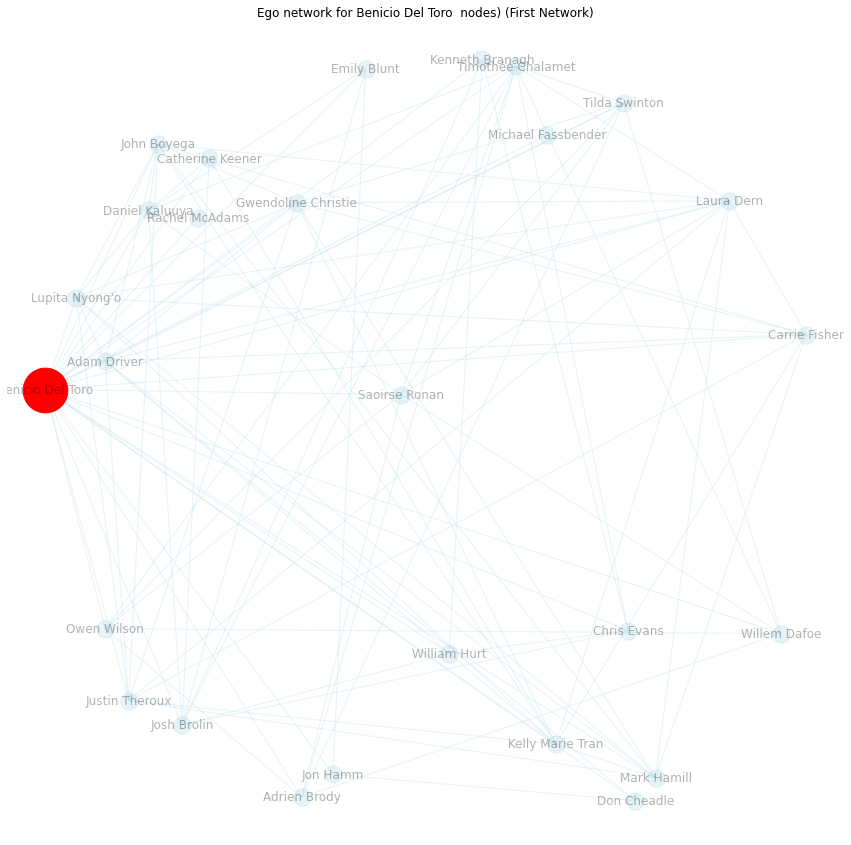

Ego network for: Benicio Del Toro
Density: 0.291
Diameter: 2
Amount of Nodes: 27
Amount of Edges: 102
Average Shortest Path Length: 1.709
Average Clustering Coefficient: 0.712
Average Degree: 7.556


In [42]:
ego = 'Benicio Del Toro'
eg = nx.ego_graph(first_network, ego)
pos = nx.spring_layout(first_network, k=2.2) # fix node position

plt.figure(figsize=(15, 15))
title = f'Ego network for {ego}  nodes) (First Network)'
plt.title(title, fontsize=12)

# draw network
nx.draw_networkx(eg, pos, with_labels=True, font_size=12,
                 node_size=300, node_color='lightblue', edge_color='lightblue', alpha=0.3)

# draw ego with different characteristics
nx.draw_networkx_nodes(eg, pos, nodelist=[ego], node_size=2000, 
                       node_color='red')
plt.axis("off")
plt.show()

# compute network characteristics
print(f'Ego network for: {ego}')
print(f'Density: {round(nx.density(eg), 3)}')
print(f'Diameter: {nx.diameter(eg)}')
print(f'Amount of Nodes: {eg.number_of_nodes()}')
print(f'Amount of Edges: {eg.number_of_edges()}')
print(f'Average Shortest Path Length: {round(nx.average_shortest_path_length(eg), 3)}')
print(f'Average Clustering Coefficient: {round(nx.average_clustering(eg), 3)}')
print(f'Average Degree: {round(pd.Series(dict(nx.degree(eg))).mean(), 3)}')

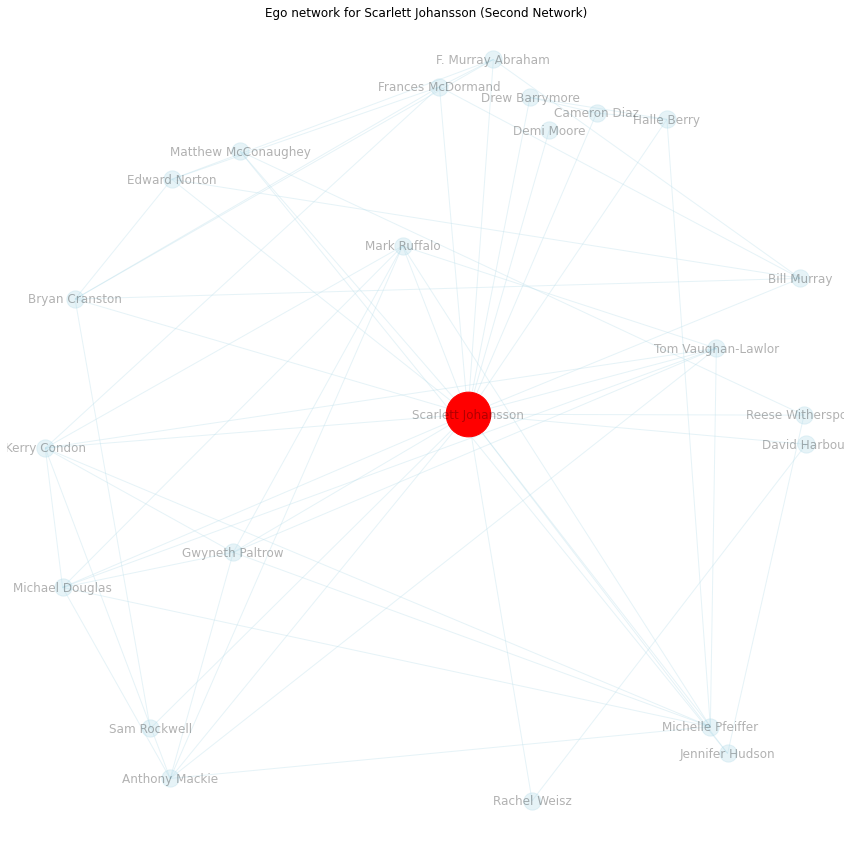

Ego Network for: Scarlett Johansson
Density: 0.249
Diameter: 2
Number of Nodes: 23
Number of Edges: 63
Average Shortest Path Length: 1.751
Average Clustering Coefficient: 0.864
Average Degree: 5.478


In [43]:
ego = 'Scarlett Johansson'
eg = nx.ego_graph(second_network, ego)
pos = nx.spring_layout(second_network, k=2.2) # fix node position

plt.figure(figsize=(15, 15))
title = f'Ego network for {ego} (Second Network)'
plt.title(title, fontsize=12)

# draw network
nx.draw_networkx(eg, pos, with_labels=True, font_size=12,
                 node_size=300, node_color='lightblue', edge_color='lightblue', alpha=0.3)

# draw the ego in a different colour with larger node size
nx.draw_networkx_nodes(eg, pos, nodelist=[ego], node_size=2000, 
                       node_color='red')
plt.axis("off")
plt.show()

# draw ego with different characteristics
print(f'Ego Network for: {ego}')
print(f'Density: {round(nx.density(eg), 3)}')
print(f'Diameter: {nx.diameter(eg)}')
print(f'Number of Nodes: {eg.number_of_nodes()}')
print(f'Number of Edges: {eg.number_of_edges()}')
print(f'Average Shortest Path Length: {round(nx.average_shortest_path_length(eg), 3)}')
print(f'Average Clustering Coefficient: {round(nx.average_clustering(eg), 3)}')
print(f'Average Degree: {round(pd.Series(dict(nx.degree(eg))).mean(), 3)}')

A spring pattern was used to visualise each of the ego networks above. The following network properties, which have previously been extensively discussed for entire networks, were also computed: size, density, connectedness, diameter, average shortest path length, clustering coefficient, and degree.

The above results indicate that the two networks have similar network properties, such as density, which is the proportion of actual edges in the network to the maximum number of possible edges. Both networks have a density over or equal to 0.249, which suggests that there is a moderate level of connectivity in both networks.

Additionally, both networks comprise a single connected component, meaning that there is a path between any two nodes in the network, and have an identical diameter of 2, which is the longest shortest path between any two nodes in the network. The average shortest path lengths in both networks are also comparable, at 1.7, indicating that the nodes in both networks are generally well connected.

Each network has a single connected component, a diameter of 2, and a density obove or equal to 0.249 similar to the other. The typical length of the shortest path is comparable (around 1.7). When it comes to the other qualities, the ego networks only differ little from one another (number of nodes, edges, average clustering coefficient and degree).Which shows that there are only minor differences between the ego networks in terms of other characteristics, such as the number of nodes, edges, average clustering coefficient, and degree. These results suggest that, despite some differences, the two networks are similar in terms of their overall structure and connectivity patterns.

Overall, the results of the ego-centric analysis provide valuable insights into the relationships and interactions of the specific node (the ego) in the two networks and help to better understand the structure and function of the two networks.

## 5. Network Visualisation

Gephi is an open-source network visualization software that is commonly used to visualize and analyze complex network structures. Network visualization in Gephi involves several steps, including:

Data preparation: The first step in network visualization is to prepare the data for analysis. This may involve cleaning, transforming, and formatting the data into a suitable format for Gephi to process.

Network import: The second step is to import the network data into Gephi. This can be done by loading the data into Gephi's workspace or by using Gephi's built-in data import tools.

Layout calculation: After the network data has been imported into Gephi, the next step is to calculate a layout for the network. Gephi provides several built-in layout algorithms, including Force Atlas, Fruchterman-Reingold, and Multi-Scale. These algorithms determine the position of nodes in the network based on various criteria, such as node degree, node strength, or node centrality.

Visual styling: Once the layout of the network has been determined, the next step is to style the network visually. This may involve changing the color, size, and shape of nodes and edges based on various network properties, such as node degree, node strength, or node centrality.

Filtering: Filtering is an important step in network visualization, as it allows users to focus on specific aspects of the network and remove elements that are not relevant to the analysis. Gephi provides several built-in filtering tools, including range filtering, partition filtering, and attribute filtering.

Interactive exploration: The final step in network visualization is to explore and analyze the network interactively. Gephi provides several built-in tools for exploring and analyzing networks, including the statistics panel, the data laboratory, and the preview window. These tools allow users to interact with the network, select nodes and edges, and explore network properties and relationships.

Overall, network visualization in Gephi is a powerful tool for exploring and analyzing complex network structures. By following the steps outlined above, users can create meaningful and effective visualizations of network data that help to reveal key insights into the structure and function of the network.

Finally, Gephi can the be used to create visualisations of both networks by exporting them as GEXF files and saving them as first network.png and second network.png, respectively. The betweenness centrality scores have been used to scale the node colour, size, and label size. Fruchterman Reingold and Label Adjust are the force-directed layout algorithms used to improve visualisation.

In [45]:
nx.write_gexf(first_network, 'first_network.gexf', prettyprint=True)

![title](Betweennessfirst_network.png)

In [34]:
nx.write_gexf(second_network, 'second_network.gexf', prettyprint=True)

![title](Betweennesssecond_network.png)

End of Analysis.